# Projeto 2 - Backtest modelo de investimento em dividendos

<br> 

### Desafio:

* Testar se escolher empresas de dividendos funcionou no Brasil nos últimos anos.

<br> 

### Passo a passo:

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Baixar os dados disponibilizados.
   
   **Passo 3** - Pegar as datas que iremos balancear a carteira. 
   
   **Passo 4** - Filtrar  a liquidez.
   
   **Passo 5** - Criar o ranking dos indicadores.
   
   **Passo 6** - Criar as carteiras. 
   
   **Passo 7** - Calcular a rentabilidade por carteira.
   
   **Passo 8** - Calcular a rentabilidade do modelo.

   **Passo 9** - Calcular a rentabilidade do ibovespa no mesmo período.

   **Passo 10** - Analisar os resultados.
   
   **Passo 11** - Comprar a carteira.
   
-------------------

# Passo 1: Importando os módulos necessários

In [25]:
!pip install quantstats

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import pandas as pd
import quantstats as qs 

# Passo 2: Baixar os dados dispobinilizados. 

In [27]:
dados_empresas = pd.read_csv("dados_empresas.csv")

# Passo 3: Calcular os retornos mensais das empresas.

In [28]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['retorno'].shift(-1) 

# Passo 4: Filtrar liquidez.

In [29]:
dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]

# Passo 5: Criar o ranking dos indicadores.

In [30]:
dados_empresas['ranking_dy'] = dados_empresas.groupby('data')['dy'].rank(ascending = False)

In [31]:
#exemplo de carteira

dados_empresas[dados_empresas['data'] == '2017-01-31'].sort_values('ranking_dy').head(20)

,data,ticker,preco_fechamento_ajustado,volume_negociado,dy,retorno,ranking_dy
12128,2017-01-31,CGAS5,21.95,1529936.0,0.253911,0.082916,1.0
43352,2017-01-31,TIET11,11.09,7448857.0,0.148719,0.105500,2.0
42191,2017-01-31,TAEE11,10.84,21540324.0,0.126004,0.025830,3.0
21877,2017-01-31,FESA4,1.47,1592241.0,0.091915,0.068027,4.0
30841,2017-01-31,MPLU3,30.27,11206924.0,0.090410,0.004625,5.0
36373,2017-01-31,QUAL3,14.08,19127813.0,0.082148,-0.043324,6.0
19773,2017-01-31,ENBR3,10.19,17501947.0,0.081893,-0.022571,7.0
8196,2017-01-31,BRKM5,25.09,21945659.0,0.077255,-0.006377,8.0
105,2017-01-31,ABCB4,11.46,3038383.0,0.065680,0.099476,9.0
22270,2017-01-31,FLRY3,14.26,27670408.0,0.064464,0.140252,10.0


# Passo 6: Criar as carteiras. 

In [32]:
dados_empresas = dados_empresas[dados_empresas['ranking_dy'] <= 10]

#dados_empresas[dados_empresas['data'] == '2016-01-31']

# Passo 7: Calcula a rentabilidade por carteira.

In [33]:
rentabilidade_por_carteiras = dados_empresas.groupby('data')['retorno'].mean()
rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()

# Passo 8: Calcula a rentabilidade do modelo.

In [34]:
rentabilidade_por_carteiras['estrategia_dy'] = (rentabilidade_por_carteiras['retorno'] + 1).cumprod() - 1

rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)

rentabilidade_por_carteiras = rentabilidade_por_carteiras.dropna()

In [35]:
rentabilidade_por_carteiras

,retorno,estrategia_dy
data,,
2013-01-31,-0.007706,-0.007706
2013-02-28,-0.029301,-0.036781
2013-03-31,-0.036835,-0.072262
2013-04-30,-0.073550,-0.140497
2013-05-31,-0.000735,-0.141128
...,...,...
2023-07-31,0.054601,5.285302
2023-08-31,-0.038636,5.042464
2023-09-30,0.108332,5.697054


# Passo 9: Calcula a rentabilidade do ibovespa no mesmo período.

In [36]:
ibov = pd.read_csv('ibov.csv')

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteiras['Ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('retorno', axis = 1)

# Passo 10: Resultados.

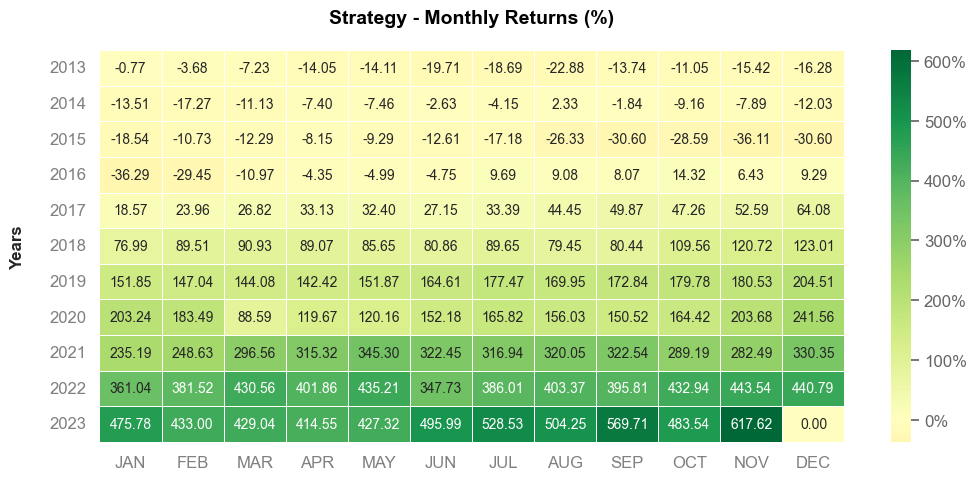

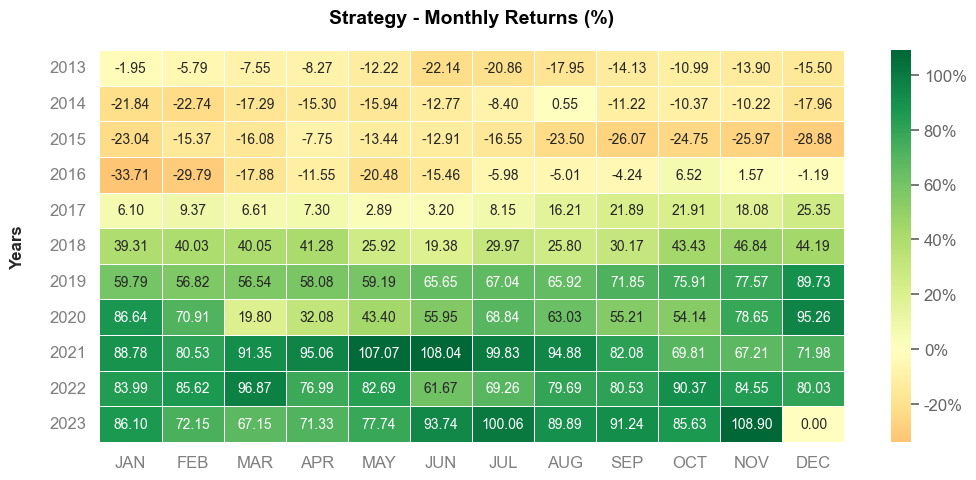

In [37]:
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)

rentabilidade_por_carteiras['estrategia_dy'].plot_monthly_heatmap()
rentabilidade_por_carteiras['Ibovespa'].plot_monthly_heatmap()

<Axes: xlabel='data'>

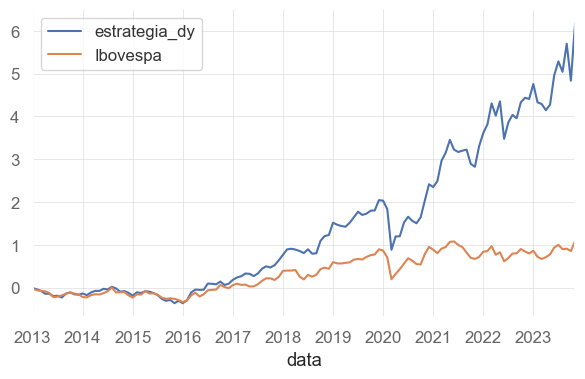

In [38]:
rentabilidade_por_carteiras.plot(figsize = (7, 4))

# Comprar a última carteira gerada pelo modelo.

https://www.mql5.com/en/docs/python_metatrader5

In [39]:
!pip install MetaTrader5

Defaulting to user installation because normal site-packages is not writeable


In [40]:
ultima_carteira = dados_empresas[dados_empresas['data'] == '2023-11-30']

tickers = ultima_carteira['ticker'].to_list()

In [41]:
tickers

['AGRO3',
 'BRAP3',
 'BRAP4',
 'CSNA3',
 'GOAU4',
 'GRND3',
 'LEVE3',
 'MTRE3',
 'PETR3',
 'PETR4']

In [42]:
import MetaTrader5 as mt5

In [43]:
mt5.initialize()
for ticker in tickers:

    print(ticker)
    
    mt5.symbol_select(ticker)
    preco = mt5.symbol_info_tick(ticker).ask
    quantidade = 100.0
    ordem_compra = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": ticker,
        "volume": quantidade,
        "type": mt5.ORDER_TYPE_BUY,
        "price": preco,
        "magic": 1,
        "comment": "Trades automáticos",
        "type_time": mt5.ORDER_TIME_DAY,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
    result_compra = mt5.order_send(ordem_compra)

AGRO3


AttributeError: 'NoneType' object has no attribute 'ask'